## Libraries and Dependencies


In [2]:
import os
import pandas as pd
import numpy as np
from collections import Counter

# Language libraries

import nltk
import string
from nltk.corpus import stopwords
import spacy

# Visualization

import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

### Variable Initialization


In [116]:
# nltk.download('stopwords')

nlp = spacy.load("en_core_web_sm")
df = pd.read_csv("C:\MLAI\Datasets\shakespeare_plays.csv.zip")

## All's well That Ends Well

### Goals

1. Details on characters and their influence in the story.

2. A gender analysis of the story and possibly bechdel test.
    a. Screentime based on gender.
    b. Interaction dynamics between male and female.

3. Pairing of character based on conversation occured.
4. Most used words for each character

In [4]:
attew = df[df.play_name == "All's Well That Ends Well"]

In [5]:
char_count = {}

for idx,i in enumerate(attew['character']):
    if i in char_count:
        char_count[i][0] += 1
    else:
        char_count[i] = [1,attew.iloc[idx,-1]]

# characters = pd.DataFrame([[key]+value for key,value in char_count.items()])
# characters.columns = ['name','count','sex']

# OR

characters = pd.DataFrame.from_dict(char_count, orient='index').reset_index()
characters.columns = ['name','count','sex']

## Text preprocessing

Steps:

1. Lower case
2. Punctuation removal
3. Remove stop words - Remove Common words
4. Stemming - remove prefic and suffix
5. Lemmatization - Base form


In [6]:
attew_text = df['text'].astype(str)

In [7]:
attew_text = attew_text.str.lower()
attew_text = attew_text.str.replace('[{}]'.format(string.punctuation),'',regex=True)

In [8]:
for i in stopwords.words('english'):
    attew_text = attew_text.str.replace(' '+i+' ', ' ')

In [ ]:
attew["text_cleaned"] = attew_text

### Lemmatization

In [ ]:
attew["text_lemmatized"]  = np.NaN

for idx,i in enumerate(attew['text_cleaned']):

    sentence = nlp(i)

    attew.loc[idx,"text_lemmatized"] =" ".join(token.lemma_ for token in sentence)

## Analysis

### Gender Analysis

In [10]:
fig= px.pie(characters,values='count',names='sex',title="Percentage of dialogue spoken by each gender")
fig.show()

### Word Clouds

In [42]:
def display_wordcloud(data,column_name,character_name = "character"):

    '''Generate and display a word cloud based on text data in a specified column of a DataFrame.

    Parameters:
            - data (DataFrame): The DataFrame containing the text data.
            - column_name (str): The name of the column in the DataFrame containing the text data.
            - character_name (str, optional): The name of the character to be plotted for a specific character. 
                                       Defaults to "character".

    Returns:
            - None
    '''

    wordcloud_txt = ' '.join(data[column_name])


    wordcloud = WordCloud(width=800, height=400, colormap='YlOrBr', background_color= 'gray', stopwords=set(set(stopwords.words("english")))
                     ).generate(wordcloud_txt)

    # Displaying word cloud
    plt.figure(figsize=(15, 10))
    plt.title(" Wordcloud for {}".format(character_name))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [43]:
# wordcloud_txt = ' '.join(attew["text_cleaned"])

# wordcloud = WordCloud(width=800, height=400, colormap='YlOrBr', background_color= 'gray', stopwords=set(set(stopwords.words("english")))
#                      ).generate(wordcloud_txt)

# # Displaying word cloud
# plt.figure(figsize=(15, 10))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

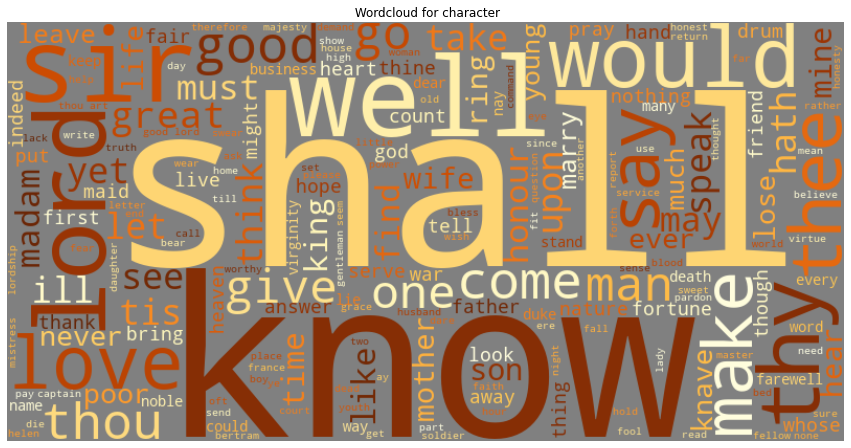

In [44]:
display_wordcloud(attew,'text_lemmatized')

#### Each character word counts

In [14]:
# character_wordcount = {}

# for i in attew['character'].unique():

#     character_wordcount[i] = attew[attew['character'] == i]['text_cleaned']

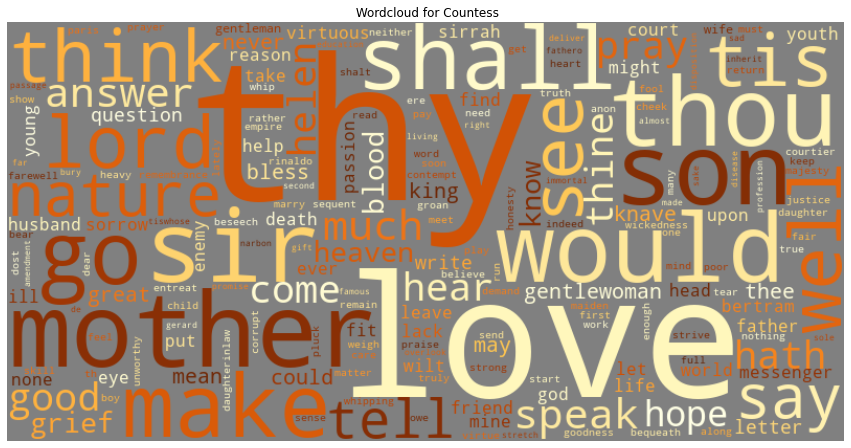

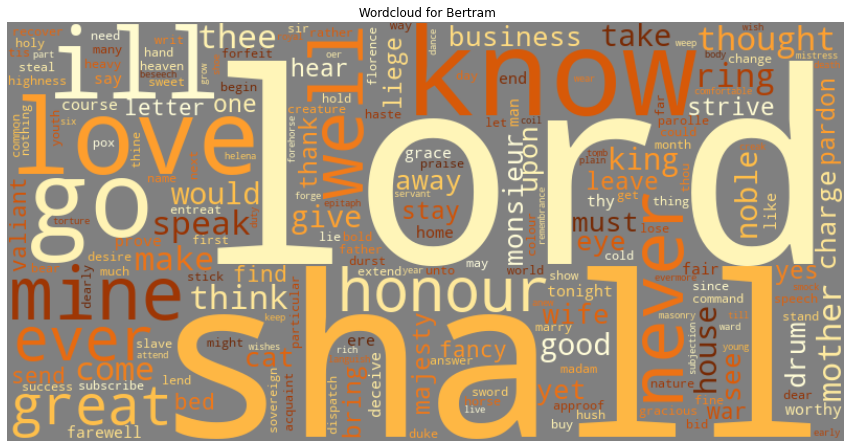

In [39]:
for i in attew['character'].unique()[:2]:

    print
    display_wordcloud(attew[attew['character'] == i],'text_lemmatized',i)

### Entity Word Cloud

In [118]:
combined_text = nlp(" ".join(attew['text_lemmatized']))

entities = pd.DataFrame([ [e,e.label_,e.label] for e in combined_text.ents],columns = ['entity','type','count'])

In [119]:
entity_count = pd.DataFrame(entities["type"].value_counts().reset_index())

fig= px.pie(entity_count,values = "type", names = "index",title="Percentage of entities in the plays")
fig.show()